In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
def read_json_file(file_name):
    with open(file_name, 'r') as file:
        data = json.load(file)
    return data

In [5]:
path = './results_2/'
sizes_matrix = [10, 20, 40, 80, 160, 320, 640]
all_data = {}
for size in sizes_matrix:
    file_name = str(size) + '_dct2.json'
    data = read_json_file(path + file_name)
    all_data[size] = data

## Time 

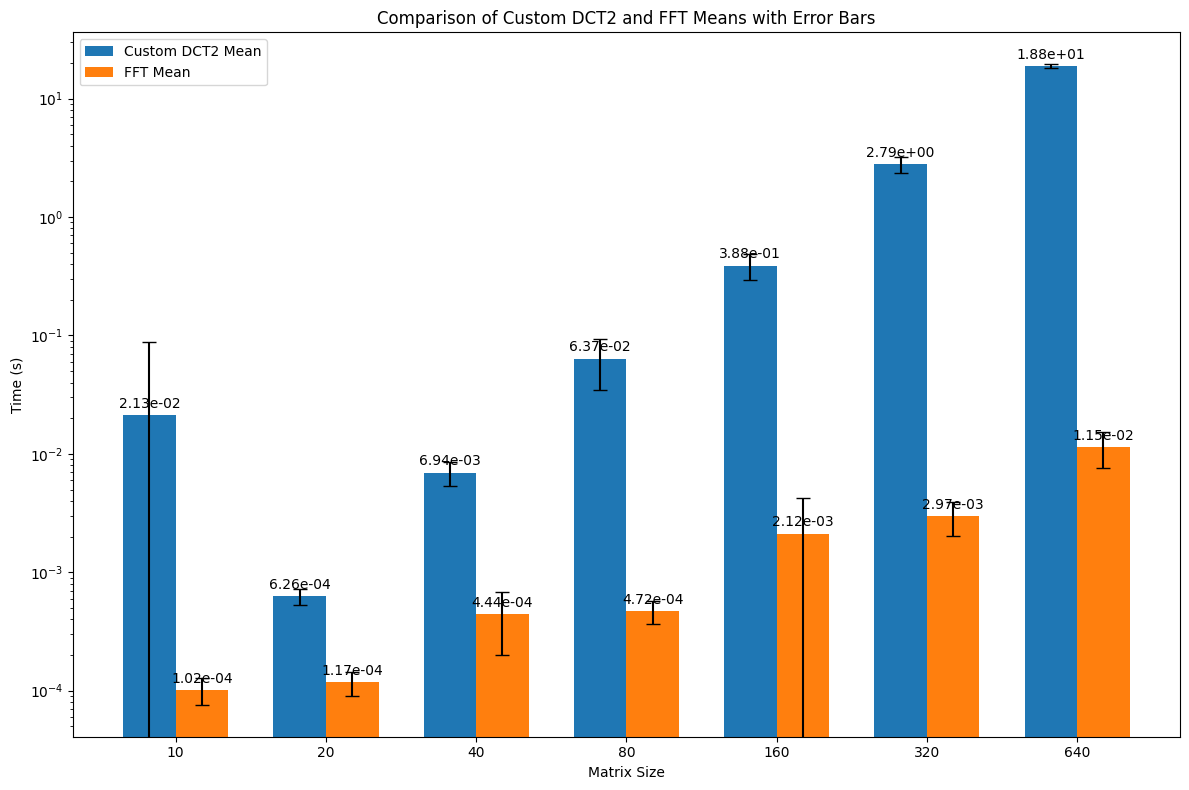

In [38]:
# Estrazione dei dati
sizes = [all_data[key]['sizes'] for key in all_data]
custom_means = [all_data[key]['custom_mean'] for key in all_data]
custom_stds = [all_data[key]['custom_std'] for key in all_data]
fft_means = [all_data[key]['fft_mean'] for key in all_data]
fft_stds = [all_data[key]['fft_std'] for key in all_data]

# Configurazione del grafico
x = np.arange(len(sizes))  # posizione delle barre
width = 0.35  # larghezza delle barre

fig, ax = plt.subplots(figsize=(12, 8))

# Creazione delle barre con errori
rects1 = ax.bar(x - width/2, custom_means, width, label='Custom DCT2 Mean', yerr=custom_stds, capsize=5)
rects2 = ax.bar(x + width/2, fft_means, width, label='FFT Mean', yerr=fft_stds, capsize=5)

ax.set_yscale('log')

# Aggiunta delle etichette, titolo e legenda
ax.set_xlabel('Matrix Size')
ax.set_ylabel('Time (s)')
ax.set_title('Comparison of Custom DCT2 and FFT Means with Error Bars')
ax.set_xticks(x)
ax.set_xticklabels(sizes)
ax.legend()

# Funzione per aggiungere etichette sulle barre
def autolabel(rects):
    """Attaches a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2e}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Aggiunta delle etichette
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

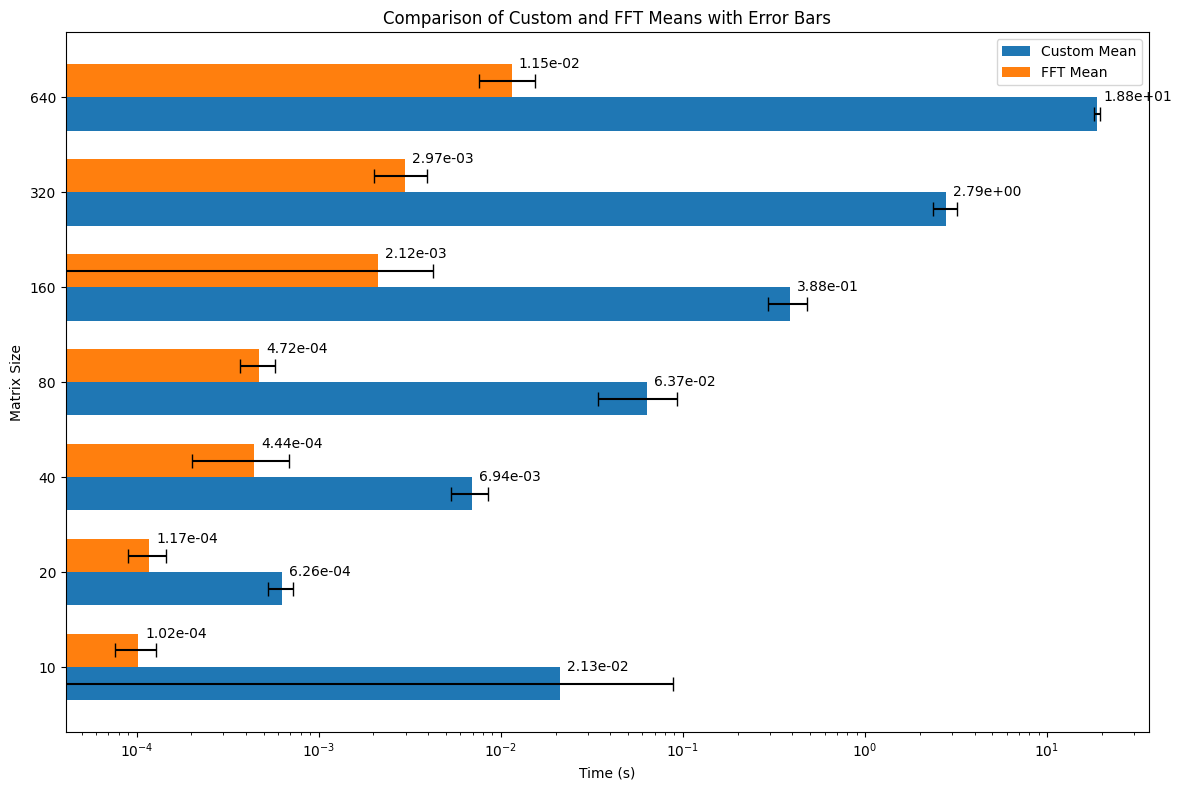

In [36]:
# Estrazione dei dati
sizes = [all_data[key]['sizes'] for key in all_data]
custom_means = [all_data[key]['custom_mean'] for key in all_data]
custom_stds = [all_data[key]['custom_std'] for key in all_data]
fft_means = [all_data[key]['fft_mean'] for key in all_data]
fft_stds = [all_data[key]['fft_std'] for key in all_data]

# Configurazione del grafico
y = np.arange(len(sizes))  # posizione delle barre
height = 0.35  # altezza delle barre

fig, ax = plt.subplots(figsize=(12, 8))

# Creazione delle barre orizzontali con errori
rects1 = ax.barh(y - height/2, custom_means, height, label='Custom Mean', xerr=custom_stds, capsize=5)
rects2 = ax.barh(y + height/2, fft_means, height, label='FFT Mean', xerr=fft_stds, capsize=5)

# Impostazione della scala logaritmica per l'asse x
ax.set_xscale('log')

# Aggiunta delle etichette, titolo e legenda
ax.set_ylabel('Matrix Size')
ax.set_xlabel('Time (s)')
ax.set_title('Comparison of Custom and FFT Means with Error Bars')
ax.set_yticks(y)
ax.set_yticklabels(sizes)
ax.legend()

# Funzione per aggiungere etichette sulle barre
def autolabel(rects):
    """Attaches a text label at the end of each bar in *rects*, displaying its length."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width:.2e}',
                    xy=(width, rect.get_y() + rect.get_height()),
                    xytext=(5, 0),  # 5 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

# Aggiunta delle etichette
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()